<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

# Getting an idea of what the data looks like
df.shape
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Chosen test: 8th Grade Math Scores

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
# Renaming the columns to something more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


In [4]:
#Checking to make sure they changed
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [5]:
# Number of missing values in AVG_MATH_8_SCORE
df["AVG_MATH_8_SCORE"].isna().sum()

1113

In [6]:
# Removing entries with missing AVG_MATH_8_SCOREs
df.dropna(subset = ["AVG_MATH_8_SCORE"], inplace = True)
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  205
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLL_PREK                      84
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  205
ENROLL_HS                       154
ENROLL_ALL                       74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

In [7]:
# Filled in missing enrollment estimates like in the tutorial
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

In [8]:
# Making sure there is still enough observations after cleaning
df.shape

(602, 25)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [9]:
# Standardization for relevant features (i.e. total expediture/student, instruction expenditure/student, support services expenditure/student)
df["TOTAL_EXPEND_PER_STUDENT"] = df["TOTAL_EXPENDITURE"] / df["ENROLL_ALL"]
df["INSTRUCTION_EXPEND_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_ALL"]
df["SUPPORT_SERVICES_EXPEND_PER_STUDENT"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["ENROLL_ALL"]

# Looking at calculated data for new features
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_EXPEND_PER_STUDENT,INSTRUCTION_EXPEND_PER_STUDENT,SUPPORT_SERVICES_EXPEND_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,2.025197,1.004650
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,2.132082,1.496312
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,2.184247,1.095128
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,2.732512,1.621537
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154,2.680986,1.691007


Final feature list: TOTAL_EXPEND_PER_STUDENT, INSTRUCTION_EXPEND_PER_STUDENT, SUPPORT_SERVICES_EXPEND_PER_STUDENT, AVG_READING_8_SCORE

Feature selection justification: I chose each of these expenditure per student categories because I suspect that investing more money per student will improve the quality of their education, thereby impacting the math scores. I also included average 8th grade reading score because I suspect that a quality education would result in excellence among multiple subjects, so high 8th grade reading scores are likely associated with high 8th grade math scores (and v.v.)

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, '8th grade math score (Out of 500)')

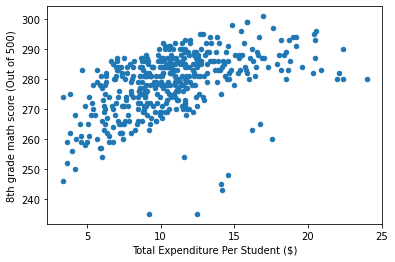

In [10]:
# Seeing how expenditure relates to 8th grade math scores
df.plot.scatter(x = "TOTAL_EXPEND_PER_STUDENT", y = "AVG_MATH_8_SCORE")
plt.xlabel('Total Expenditure Per Student ($)')
plt.ylabel('8th grade math score (Out of 500)')

The average 8th grade math score seems to be positively correlated with total expenditure per student. This also inspired me to include the other expenditure measures (i.e. support expenditure and instruction expenditure) as noted above. This tells us that there may be truth to the suspicion that investing more in education per student will improve testing outcomes.

Visualization 2

Text(0, 0.5, '8th grade math score (Out of 500)')

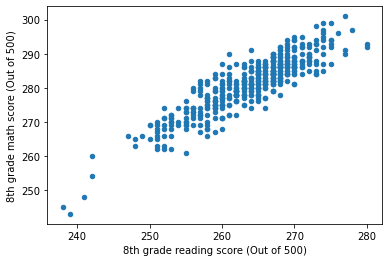

In [11]:
# Seeing how 8th grade reading scores relates to 8th grade math scores
df.plot.scatter(x = "AVG_READING_8_SCORE", y = "AVG_MATH_8_SCORE")
plt.xlabel('8th grade reading score (Out of 500)')
plt.ylabel('8th grade math score (Out of 500)')

The average 8th grade math score seems to be positively correlated with average 8th grade reading score. This may support my suspicion that exellence in one subject area (reading in this case) is indicative of overall education quality, so high scores in reading are also associated with high scores in math.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
# test_train_split randomly splits the data into two parts -- 
# one for training the model (it uses this data to learn patterns)
# and one for testing the model (to make sure it performs well on data it hasn't seen before)
from sklearn.model_selection import train_test_split

In [13]:
# Defining independent and dependent variables
X = df[["AVG_READING_8_SCORE", "TOTAL_EXPEND_PER_STUDENT","INSTRUCTION_EXPEND_PER_STUDENT", "SUPPORT_SERVICES_EXPEND_PER_STUDENT"]].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]

In [14]:
# the test_size parameter defines what % of data is set aside for testing
# random_state ensures that I get the same results each time I run the code
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: REGRESSION

In [15]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [16]:
# create your model here
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
# r**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.7717179935575192

In [20]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.3330496312095608

In [21]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

3.077278953339197

In [22]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.8749625918666175

Text(0, 0.5, '8th Grade Math Score (Out of 500)')

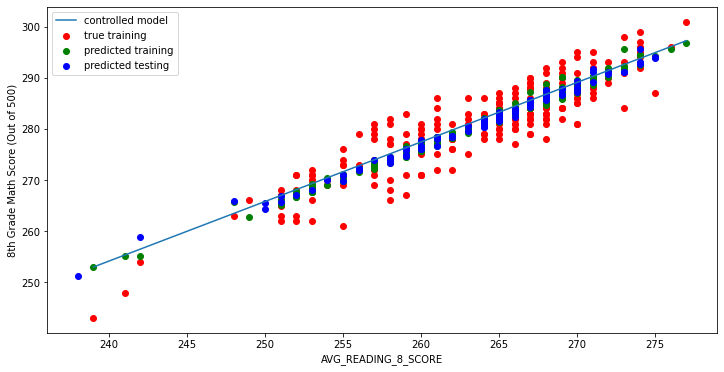

In [23]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "AVG_READING_8_SCORE"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("8th Grade Math Score (Out of 500)")

<h2> Summary </h2>

This is the result of a regression model built to predict the average math score of 8th graders based on expenditure per student by various categories (i.e. support expenditure, instruction expenditure, total expenditure) and 8th grade reading scores. To obtain this result, I removed null values in 8th grade math scores (the key variable of interest) and targeted the aforementioned features as the explanatory variables. Other data visualizations (i.e. scatterplots) were used to confirm association between these 8th grade math scores and the explanatory variables. I then trained a machine learning algorithm with a learning dataset containing the predictors and outcome variables and then tested its predictive accuracy with test sets. The resulting regression is shown above and reveals that high reading scores is a fairly strong predictor of high math scores among 8th graders (and v.v.). This can likely be attributed to scores in one subject matter reflecting overall education quality, so those who receive a strong education in one subject matter are likely to recieve a strong education in another, thereby yielding higher test scores across all subjects. On the other hand, expenditure per student appears to be a worse, yet still decent, predictor of average math score among 8th graders. Including this feature in the model improves the r^2 score, perhaps indicating that increased funds per student leads to better/more resources and quality of instruction, in turn yielding higher math scores (and v.v.). Overall, this model, which includes average 8th grade reading score and various categories of expenditure per student as predictors, seems to predict average 8th grade math score fairly well.